## STEP 02: DATA PREPROCESSING 

### 1) Load the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [2]:
data = pd.read_excel("dataset/dim_reduct_v1.xlsx")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


### 2) Distance Correlation  
Python function to calculate manually the non-linear correlation between variables

In [34]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def distance_pairs_correlation(x, y):

    # ensure numpy data type and reshape it 
    x = np.array(x).reshape(-1, 1)
    y= np.array(y).reshape(-1, 1)

    # Compute distance matrices
    A = squareform(pdist(x))
    B = squareform(pdist(y))
    
    # Double-centering
    n = len(x)
    A_row_means = A.mean(axis=1)
    A_col_means = A.mean(axis=0)
    A_mean = A.mean()
    A_centered = A - A_row_means[:, np.newaxis] - A_col_means + A_mean
    
    B_row_means = B.mean(axis=1)
    B_col_means = B.mean(axis=0)
    B_mean = B.mean()
    B_centered = B - B_row_means[:, np.newaxis] - B_col_means + B_mean

    # Compute dCor components
    cov_AB = (A_centered * B_centered).sum() / (n**2)
    var_A = (A_centered**2).sum() / (n**2)
    var_B = (B_centered**2).sum() / (n**2)

    denominator = np.sqrt(var_A * var_B)
    if denominator == 0:
        return 0.0
    
    return np.sqrt(cov_AB / denominator)

In [35]:
def matrix_dist_correlations(data):
    columns = data.columns
    n = len(columns)
    m_dist = np.zeros((n, n))

    for i_idx, i_col in enumerate(columns):
        for j_idx, j_col in enumerate(columns):
            # pass the currently distance pair correlation values 
            m_dist[i_idx, j_idx] = distance_pairs_correlation(data[i_col], data[j_col])
    
    #return pd.DataFrame(m_dist, columns=columns, index=columns)
    return m_dist

In [36]:
# make the correlation for our 40 x 46 features
corr_matrix = matrix_dist_correlations(data)

In [37]:
corr_matrix

array([[1.        , 0.66161379, 0.40137451, ..., 0.1756507 , 0.26236642,
        0.17802257],
       [0.66161379, 1.        , 0.2456182 , ..., 0.25365675, 0.25257314,
        0.19518722],
       [0.40137451, 0.2456182 , 1.        , ..., 0.2997706 , 0.28756464,
        0.28378797],
       ...,
       [0.1756507 , 0.25365675, 0.2997706 , ..., 1.        , 0.33296293,
        0.40740469],
       [0.26236642, 0.25257314, 0.28756464, ..., 0.33296293, 1.        ,
        0.38669995],
       [0.17802257, 0.19518722, 0.28378797, ..., 0.40740469, 0.38669995,
        1.        ]])

In [38]:
corr_matrix.shape

(46, 46)

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
def plot_corr_matrix(data, corr_matrix):
    variables = data.columns
    plt.figure(figsize=(24, 20))

    # Create heatmap with annotations
    ax = sns.heatmap(
        corr_matrix,
        annot=True,            # Show values in cells
        fmt=".1f",             # 2 decimal places
        cmap="coolwarm",       # Blue-white-red color scheme
        vmin=0, vmax=1,        # Fix color range between 0-1
        square=True,           # Square cells
        linewidths=0.1,         # Add grid lines
        cbar_kws={"shrink": 0.5, "label": "Correlation"}, # Color bar size
        xticklabels=variables,
        yticklabels=variables,        
    )

    # Adjust tick labels for readability
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        ha='center',
        fontsize=8  # Smaller font
    )

    ax.set_yticklabels(
        ax.get_yticklabels(),
        fontsize=8
    )

    # Improve readability
    plt.title("Distance Correlation Matrix", fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig("corr_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()


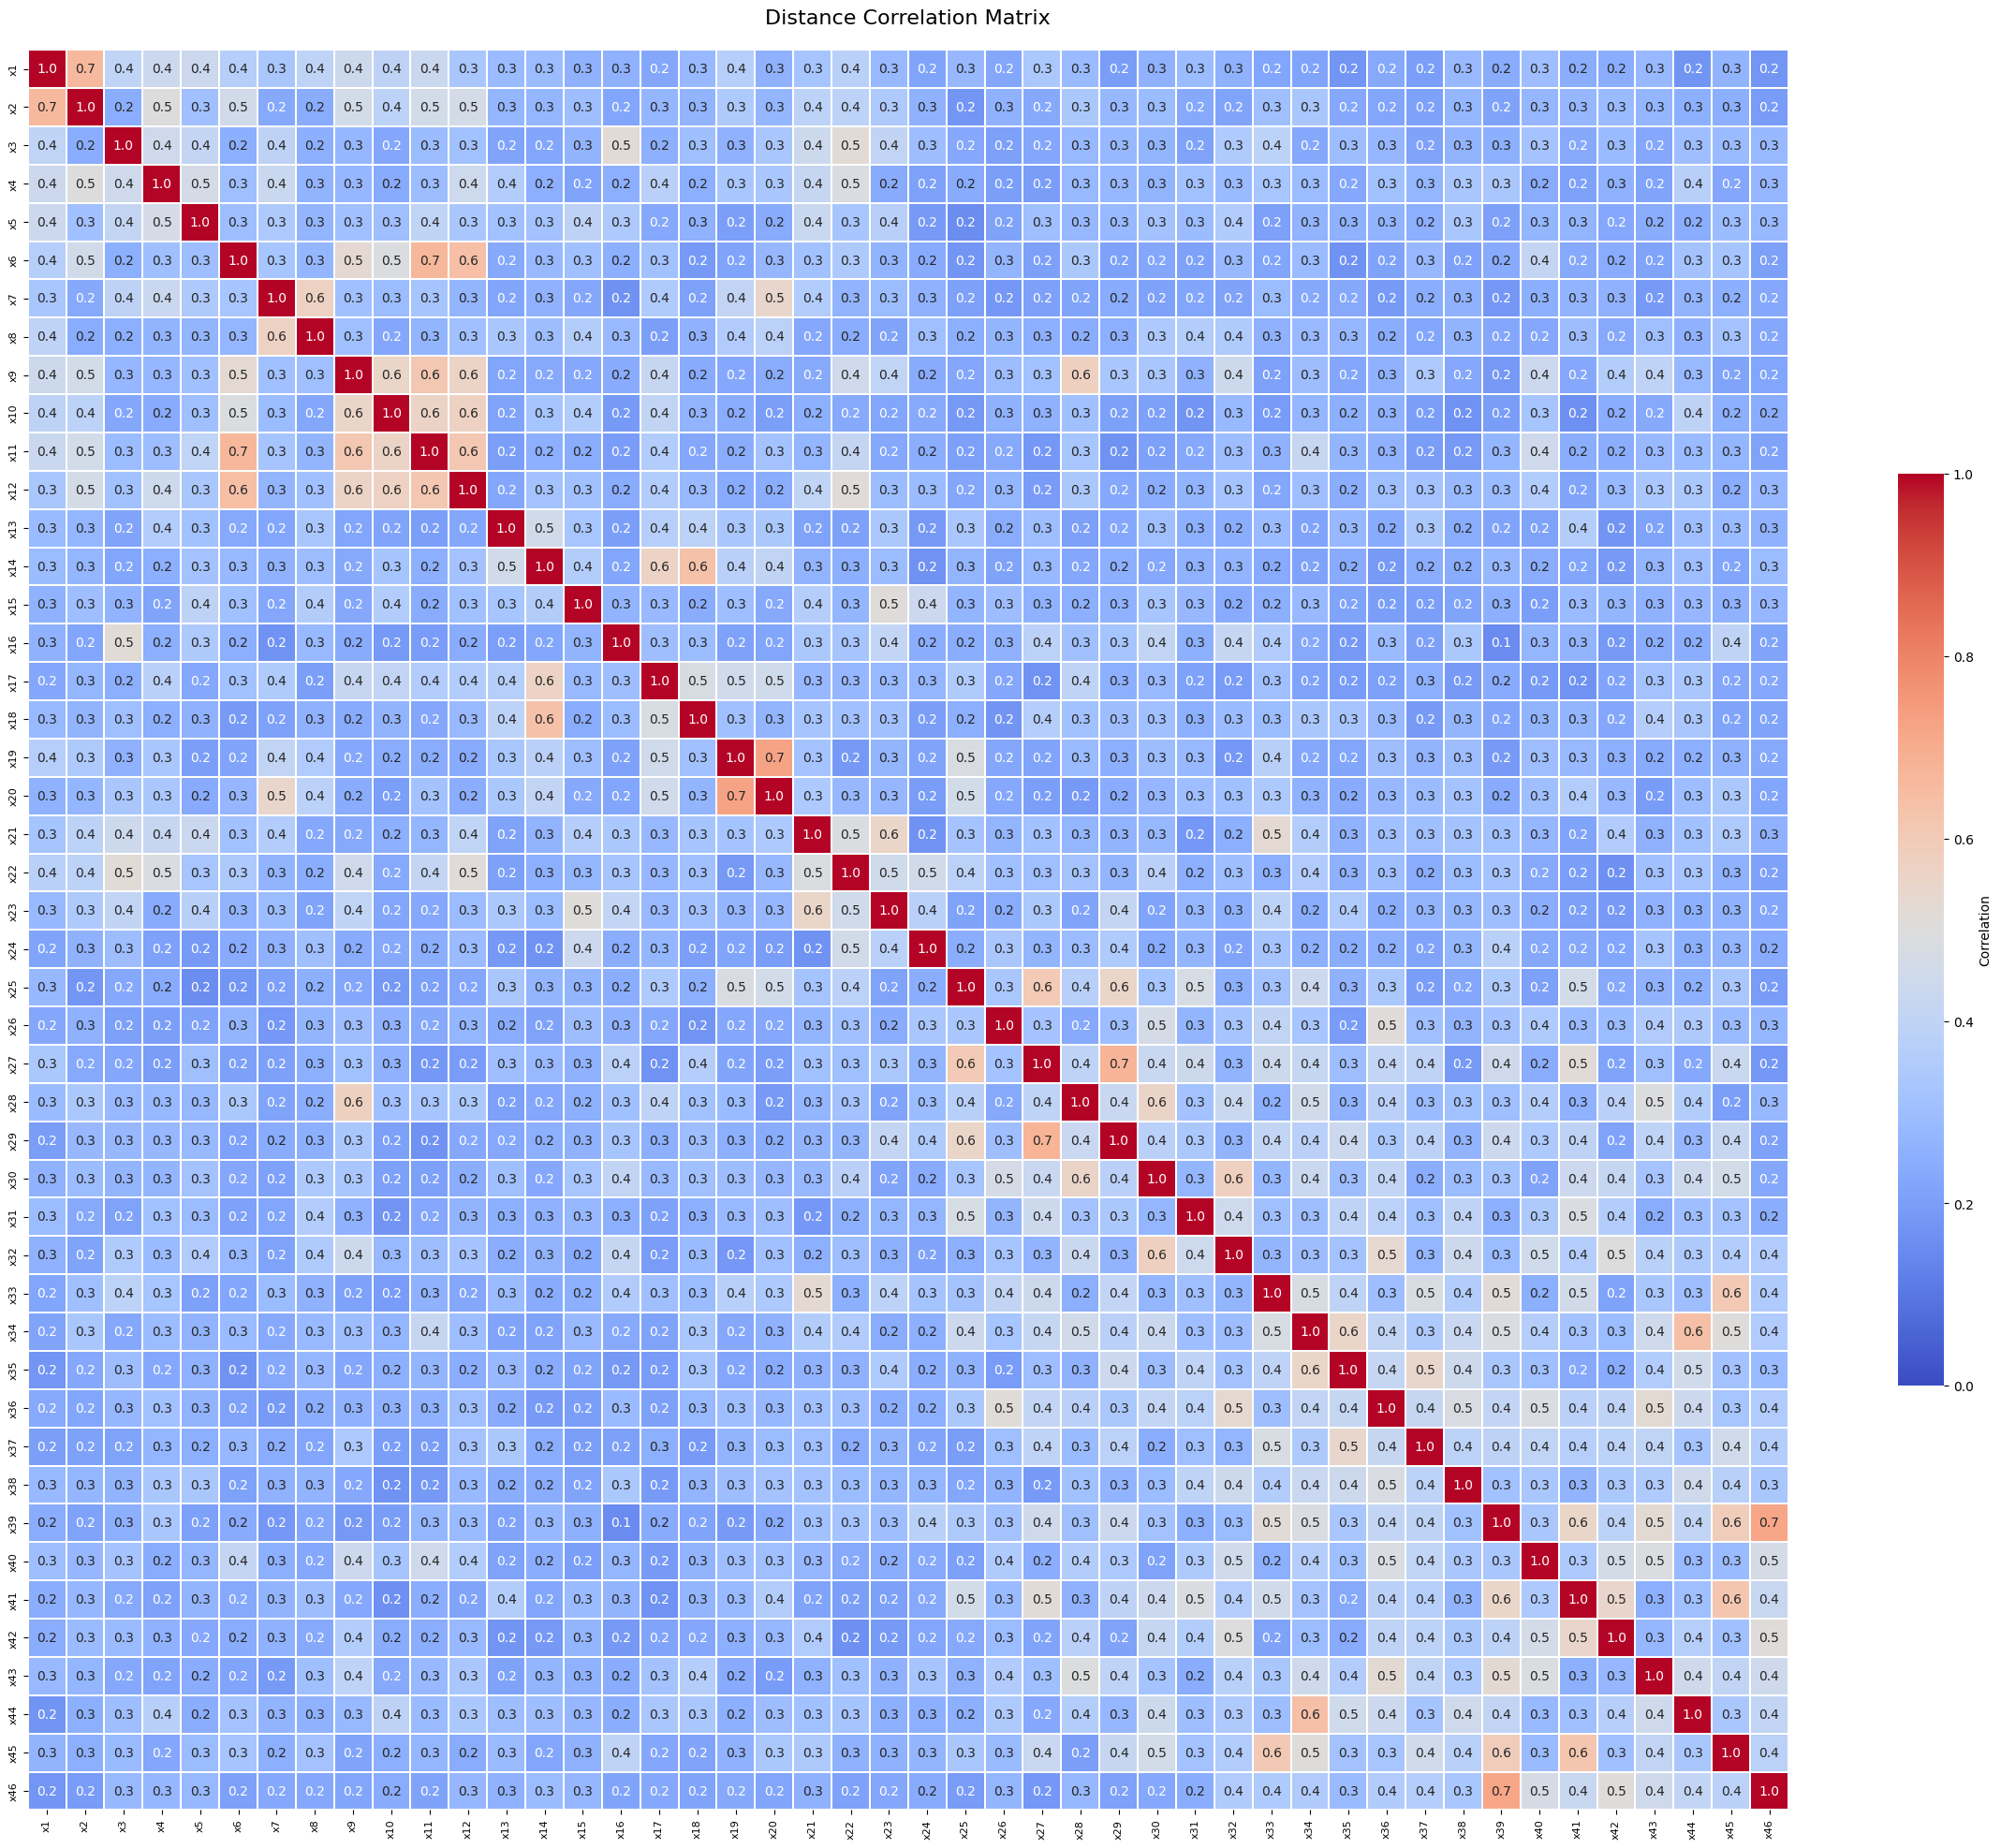

In [53]:
plot_corr_matrix(data, corr_matrix)

### 3) Hierarchical Clusterization

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [57]:
def hierarchical_clusterization(data, corr_matrix):
    variables = data.columns
    distance_matrix = 1- corr_matrix
    np.fill_diagonal(distance_matrix, 0)

    # Use linkage to create clusters
    condense_dist = squareform(distance_matrix, checks=False)
    Z = linkage(condense_dist, method='average')

    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=variables, orientation='top', leaf_rotation=90)
    plt.title("Dendrogram of Variable Similarity")
    plt.ylabel("Distance (1 - Correlation)")
    plt.show()

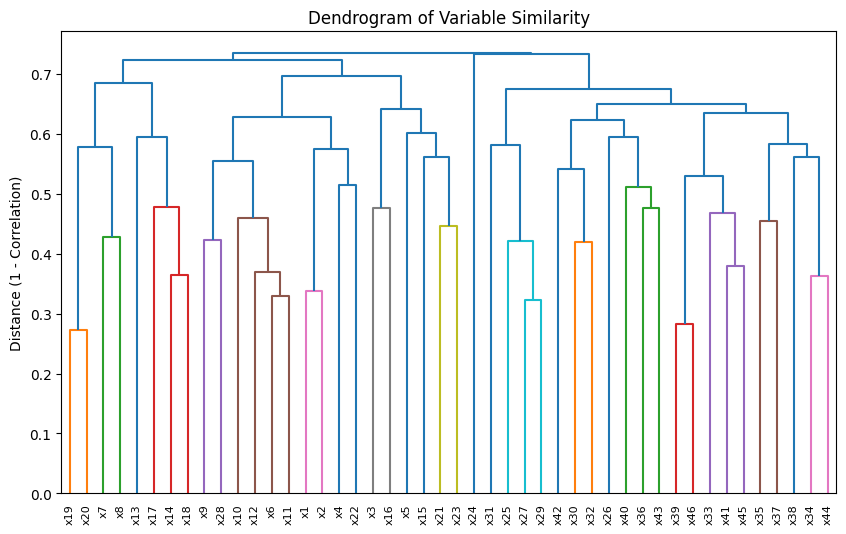

In [58]:
hierarchical_clusterization(data, corr_matrix)

Strategy of grouping variables by similarity

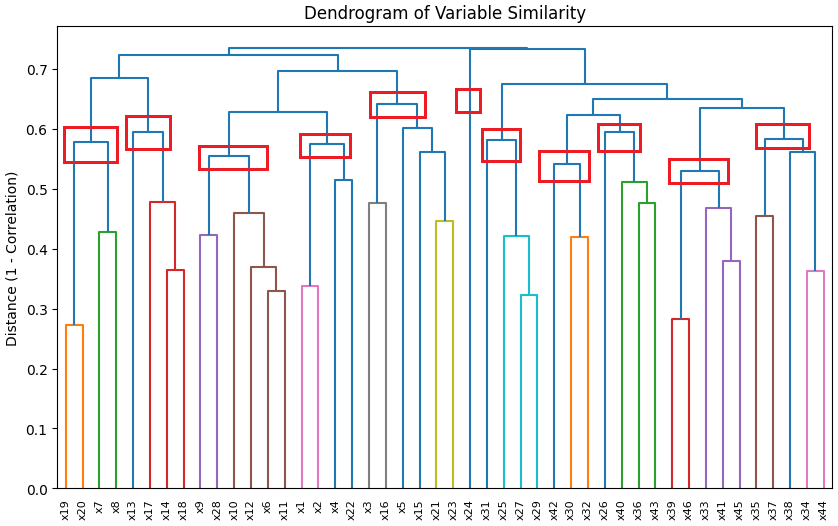

### 4) Dimensionality reduction using Kernel PCA

In [59]:
subgroups = {
    "group01": ["x19", "x20", "x7", "x8"],
    "group02": ["x13", "x17", "x14", "x18"],
    "group03": ["x9", "x28", "x10", "x12", "x6", "x11"],
    "group04": ["x1", "x2", "x4", "x22"],
    "group05": ["x3", "x16", "x5", "x15", "x21", "x23"],
    "group06": ["x24"],
    "group07": ["x31", "x25", "x27", "x29"],
    "group08": ["x42", "x30", "x32"],
    "group09": ["x26", "x40", "x36", "x43"],
    "group10": ["x39", "x46", "x33", "x41", "x45"],
    "group11": ["x35", "x37", "x38", "x34", "x44"]
}

In [71]:
# kernel pca definition
from sklearn.decomposition import KernelPCA
import numpy as np

def pca_compressor(data, input_dim, output_dim, kernel='rbf', gamma=None):
    kpca = KernelPCA(
        n_components=output_dim,
        kernel=kernel,
        gamma=gamma,
        fit_inverse_transform=False
    )
    return kpca.fit_transform(data)

In [72]:
# compression pipeline
def compression_data(data, subgroups):
    data_compressed = np.empty((data.shape[0], 0))

    for key, val in subgroups.items():
        # Select subgroup columns
        subgroup_data = data[val]
        
        if len(val) == 1:
            compressed = subgroup_data.values.reshape(-1, 1)
            print(f"Subgroup '{key}' has 1 variable → concatenated unchanged.")
        else:
            # Apply Kernel PCA for multiple variables
            compressed = pca_compressor(
                data=subgroup_data,
                input_dim=len(val),
                output_dim=1,
                kernel='rbf',
                gamma=None
            ).reshape(-1, 1)

            print(f"Compression for subgroup '{key}' ({len(val)} vars → 1D) completed.")
        
        data_compressed = np.hstack([data_compressed, compressed])

    return data_compressed

In [75]:
final_table = compression_data(data, subgroups)
print(f"Final shape: {final_table.shape}")

Compression for subgroup 'group01' (4 vars → 1D) completed.
Compression for subgroup 'group02' (4 vars → 1D) completed.
Compression for subgroup 'group03' (6 vars → 1D) completed.
Compression for subgroup 'group04' (4 vars → 1D) completed.
Compression for subgroup 'group05' (6 vars → 1D) completed.
Subgroup 'group06' has 1 variable → concatenated unchanged.
Compression for subgroup 'group07' (4 vars → 1D) completed.
Compression for subgroup 'group08' (3 vars → 1D) completed.
Compression for subgroup 'group09' (4 vars → 1D) completed.
Compression for subgroup 'group10' (5 vars → 1D) completed.
Compression for subgroup 'group11' (5 vars → 1D) completed.
Final shape: (40, 11)


In [80]:
def generate_compressed_data(final_table):
    frame_dataset = pd.DataFrame(final_table)
    frame_dataset.columns = ["x1*", "x2*", "x3*", "x4*", "x5*", 
                            "x6*", "x7*", "x8*", "x9*", "x10*", "x11*"]
    print("Dimensionality of compressed dataset: ", frame_dataset.shape)
    # save dataframe as excel file
    frame_dataset.to_excel("dataset/compressed_11d_v2.xlsx", index = False)
    
    return frame_dataset

In [81]:
generate_compressed_data(final_table)

Dimensionality of compressed dataset:  (40, 11)


,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-0.028874,-0.034820,-0.044897,-0.041207,-0.039174,-8.202325,-0.041880,-0.056215,-0.039023,-0.049477,-0.040485
1,-0.030227,-0.035068,-0.045751,-0.040894,-0.048882,-8.199735,-0.041880,-0.052109,-0.039023,-0.049080,-0.040485
2,-0.030203,-0.034803,-0.044897,-0.040682,-0.039408,-4.197295,-0.044871,-0.053145,-0.038746,-0.049080,-0.040485
3,-0.278864,-0.035140,-0.045717,-0.040682,-0.039205,-10.203114,-0.041881,-0.052108,-0.039301,-0.049080,-0.040485
4,0.642540,0.732538,-0.044952,-0.041415,-0.043180,3.797573,-0.041880,-0.052109,-0.039037,-0.049080,-0.040485
5,-0.030203,-0.034803,-0.044897,-0.040683,-0.040755,3.805688,-0.041895,-0.053196,-0.039304,-0.052832,-0.040485
6,-0.283787,-0.034803,-0.044905,-0.040682,-0.039174,-6.196530,-0.041881,-0.052108,-0.039025,-0.049080,-0.040484
7,-0.030203,-0.034803,0.684409,-0.163549,-0.039174,-4.195568,-0.041880,-0.053829,0.800882,-0.049080,-0.040853
8,-0.030203,-0.034803,-0.049095,-0.040682,-0.039174,-8.196023,-0.042653,-0.072080,-0.039964,-0.049080,-0.040691
9,-0.030203,-0.034803,-0.044905,-0.040770,0.060153,-0.194854,-0.041880,-0.056215,-0.039037,-0.049477,-0.040485


In [82]:
final_table.shape

(40, 11)

                --- Here conclude the preprocessing part taking in account the last modifications ---

_____________________________________________